In [6]:
from datasets import load_dataset
import numpy as np

# Load the dataset
dataset = load_dataset('mnist')

# Convert to numpy arrays
X_train = np.array(dataset['train']['image'])
y_train = np.array(dataset['train']['label'])

X_test = np.array(dataset['test']['image'])
y_test = np.array(dataset['test']['label'])

# Flatten the images (28x28 → 784)
X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)

# Normalize the pixel values
X_train = X_train.astype(np.float32) / 255.0
X_test = X_test.astype(np.float32) / 255.0

# Convert labels to integers
y_train = y_train.astype(np.int64)
y_test = y_test.astype(np.int64)


README.md:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/15.6M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/2.60M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/60000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def show_images(images, labels):
    """
    Display a set of images and their labels using matplotlib.
    The first column of `images` should contain the image indices,
    and the second column should contain the flattened image pixels
    reshaped into 28x28 arrays.
    """
    # Extract the image indices and reshaped pixels
    pixels = images.reshape(-1, 28, 28)

    # Create a figure with subplots for each image
    fig, axs = plt.subplots(
        ncols=len(images), nrows=1, figsize=(10, 3 * len(images))
    )

    # Loop over the images and display them with their labels
    for i in range(len(images)):
        # Display the image and its label
        axs[i].imshow(pixels[i], cmap="gray")
        axs[i].set_title("Label: {}".format(labels[i]))

        # Remove the tick marks and axis labels
        axs[i].set_xticks([])
        axs[i].set_yticks([])
        axs[i].set_xlabel("Index: {}".format(i))

    # Adjust the spacing between subplots
    fig.subplots_adjust(hspace=0.5)

    # Show the figure
    plt.show()

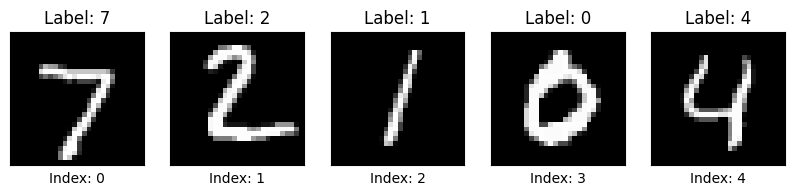

In [10]:
show_images(X_test[0:5],y_test[0:5])

In [11]:
import torch.nn as nn 

In [17]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.num_hidden=8
        self.encoder = nn.Sequential(
            nn.Linear(784, 256),  # input size: 784, output size: 256
            nn.ReLU(),  # apply the ReLU activation function
            nn.Linear(256, self.num_hidden),  # input size: 256, output size: num_hidden
            nn.ReLU(),  # apply the ReLU activation function
        )
        
        # Define the decoder part of the autoencoder
        self.decoder = nn.Sequential(
            nn.Linear(self.num_hidden, 256),  # input size: num_hidden, output size: 256
            nn.ReLU(),  # apply the ReLU activation function
            nn.Linear(256, 784),  # input size: 256, output size: 784
            nn.Sigmoid(),  # apply the sigmoid activation function to compress the output to a range of (0, 1)
        )
    def forward(self,x):
         encoded = self.encoder(x)
         decoded = self.decoder(encoded)
         return encoded ,decoded 

In [27]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

#X_train = torch.from_numpy(X_train)
learning_rate =0.001
batch_size=64

# Create the autoencoder model and optimizer
model = AutoEncoder()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Define the loss function
criterion = nn.MSELoss()


# Create a DataLoader to handle batching of the training data
train_loader = torch.utils.data.DataLoader(
    X_train, batch_size=batch_size, shuffle=True
)

In [28]:
num_epochs =50
for epoch in range(num_epochs):
    total_loss = 0.0
    for batch_idx, data in enumerate(train_loader):
        # Get a batch of training data and move it to the device
        #data = data.to(device)

        # Forward pass
        encoded, decoded = model(data)

        # Compute the loss and perform backpropagation
        loss = criterion(decoded, data)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Update the running loss
        total_loss += loss.item() * data.size(0)

    # Print the epoch loss
    epoch_loss = total_loss / len(train_loader.dataset)
    print(
        "Epoch {}/{}: loss={:.4f}".format(epoch + 1, num_epochs, epoch_loss)
    )

Epoch 1/50: loss=0.0425
Epoch 2/50: loss=0.0319
Epoch 3/50: loss=0.0303
Epoch 4/50: loss=0.0293
Epoch 5/50: loss=0.0286
Epoch 6/50: loss=0.0281
Epoch 7/50: loss=0.0277
Epoch 8/50: loss=0.0274
Epoch 9/50: loss=0.0271
Epoch 10/50: loss=0.0269
Epoch 11/50: loss=0.0267
Epoch 12/50: loss=0.0265
Epoch 13/50: loss=0.0264
Epoch 14/50: loss=0.0262
Epoch 15/50: loss=0.0260
Epoch 16/50: loss=0.0259
Epoch 17/50: loss=0.0258
Epoch 18/50: loss=0.0256
Epoch 19/50: loss=0.0255
Epoch 20/50: loss=0.0254
Epoch 21/50: loss=0.0253
Epoch 22/50: loss=0.0252
Epoch 23/50: loss=0.0251
Epoch 24/50: loss=0.0250
Epoch 25/50: loss=0.0249
Epoch 26/50: loss=0.0249
Epoch 27/50: loss=0.0248
Epoch 28/50: loss=0.0247
Epoch 29/50: loss=0.0247
Epoch 30/50: loss=0.0246
Epoch 31/50: loss=0.0246
Epoch 32/50: loss=0.0245
Epoch 33/50: loss=0.0244
Epoch 34/50: loss=0.0244
Epoch 35/50: loss=0.0243
Epoch 36/50: loss=0.0243
Epoch 37/50: loss=0.0242
Epoch 38/50: loss=0.0242
Epoch 39/50: loss=0.0241
Epoch 40/50: loss=0.0241
Epoch 41/

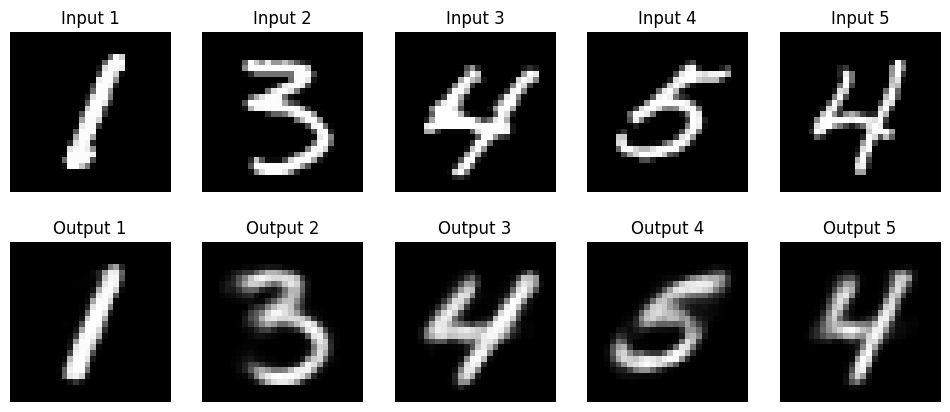

Test Loss: 0.0244


In [30]:
test_loader = torch.utils.data.DataLoader(
    X_test, batch_size=batch_size, shuffle=True
)


# Set the model to evaluation mode
model.eval()
test_loss = 0.0

with torch.no_grad():
    for batch_idx, data in enumerate(test_loader):
        # Move data to the same device
       # data = data.to(device)

        # Forward pass
        encoded, decoded = model(data)

        # Compute the loss
        loss = criterion(decoded, data)
        test_loss += loss.item() * data.size(0)

        # Show input and output for the first batch only
        if batch_idx == 0:
            import matplotlib.pyplot as plt

            n = 5  # Number of images to display
            fig, axes = plt.subplots(2, n, figsize=(12, 5))
            for i in range(n):
                # Input image
                axes[0, i].imshow(data[i].detach().cpu().numpy().reshape(28, 28), cmap="gray")
                axes[0, i].set_title(f"Input {i + 1}")
                axes[0, i].axis("off")

                # Output (reconstructed) image
                axes[1, i].imshow(decoded[i].detach().cpu().numpy().reshape(28, 28), cmap="gray")
                axes[1, i].set_title(f"Output {i + 1}")
                axes[1, i].axis("off")

            plt.show()

# Calculate the average test loss
test_loss /= len(test_loader.dataset)
print(f"Test Loss: {test_loss:.4f}")


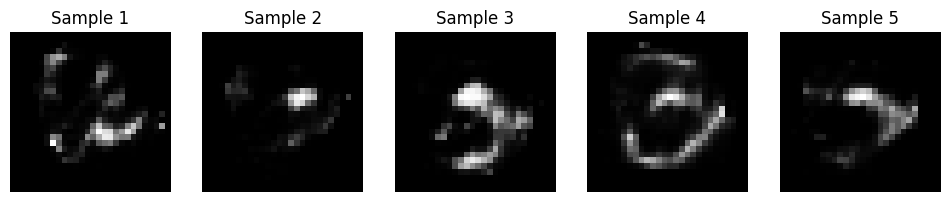

In [37]:
import torch
import matplotlib.pyplot as plt

# Set the model to evaluation mode
model.eval()

# Number of samples to generate
n_samples = 5
latent_dim = model.num_hidden  # Latent space dimension

# Generate random latent vectors from a normal distribution
latent_vectors = torch.randn(n_samples, latent_dim)


# Pass through the decoder to generate samples
with torch.no_grad():
    generated = model.decoder(latent_vectors)

# Plot the generated samples
fig, axes = plt.subplots(1, n_samples, figsize=(12, 3))
for i in range(n_samples):
    axes[i].imshow(generated[i].cpu().numpy().reshape(28, 28), cmap="gray")
    axes[i].set_title(f"Sample {i + 1}")
    axes[i].axis("off")

plt.show()


In [ ]:
class VAE(AutoEncoder):
    def __init__(self):
        super().__init__()
        self.mu = nn.Linear(self.num_hidden, self.num_hidden)
        self.log_var = nn.Linear(self.num_hidden, self.num_hidden)

    def reparameterize(self,mu,log_var):
         std = torch.exp(0.5 * log_var)
         eps = torch.randn_like(std)
         return mu + eps * std
    def forward(self, x):
        # Pass the input through the encoder
        encoded = self.encoder(x)
        mu = self.mu(encoded)
        log_var = self.log_var(encoded)
        z = self.reparameterize(mu, log_var)
        decoded = self.decoder(z)
        # Return the encoded output, decoded output, mean, and log variance
        return encoded, decoded, mu, log_var

    def sample(self, num_samples):
        with torch.no_grad():
            # Generate random noise
            z = torch.randn(num_samples, self.num_hidden)
            samples = self.decoder(z)
        # Return the generated samples
        return samples

In [ ]:
def loss_func(recon_x,x,mu,logvar):
    BCE = F.binary_cross_entropy(recon_x, x.view(-1, 784), reduction="sum")
    # Compute the Kullback-Leibler divergence between the learned latent variable distribution and a standard Gaussian distribution
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD

In [ ]:
import torch.nn.functional as F
def train_vae(X_train, learning_rate=1e-3, num_epochs=100, batch_size=32):
    model = VAE()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.MSELoss(reduction="sum")
    train_loader = torch.utils.data.DataLoader(
        X_train, batch_size=batch_size, shuffle=True
    )
    for epoch in range(num_epochs):
        total_loss = 0.0
        for batch_idx, data in enumerate(train_loader):
            # Get a batch of training data and move it to the device
            #data = data.to(device)

            # Forward pass
            encoded, decoded, mu, logvar = model(data)
            loss = loss_func(decoded,data,mu,logvar)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Update the running loss
            total_loss += loss.item() * data.size(0)

       
        epoch_loss = total_loss / len(train_loader.dataset)
        print(
            "Epoch {}/{}: loss={:.4f}".format(epoch + 1, num_epochs, epoch_loss)
        )

    # Return the trained model
    return model

In [ ]:
train_vae(X_train)

Epoch 1/100: loss=5375.4581
Epoch 2/100: loss=4476.2917
Epoch 3/100: loss=4332.7596
Epoch 4/100: loss=4251.8091
Epoch 5/100: loss=4198.9031
Epoch 6/100: loss=4159.7004
Epoch 7/100: loss=4128.8111
Epoch 8/100: loss=4103.5893
Epoch 9/100: loss=4082.6404
Epoch 10/100: loss=4065.4259
Epoch 11/100: loss=4049.1549
Epoch 12/100: loss=4035.6495
Epoch 13/100: loss=4022.7179
Epoch 14/100: loss=4012.8027
Epoch 15/100: loss=4002.2477
Epoch 16/100: loss=3993.1992
Epoch 17/100: loss=3985.8876
Epoch 18/100: loss=3977.4059
Epoch 19/100: loss=3972.1555
Epoch 20/100: loss=3963.3491
Epoch 21/100: loss=3957.2052
Epoch 22/100: loss=3952.7717
Epoch 23/100: loss=3945.8575
Epoch 24/100: loss=3941.1994
Epoch 25/100: loss=3935.7914
Epoch 26/100: loss=3930.2538
Epoch 27/100: loss=3927.4828
Epoch 28/100: loss=3922.1694
Epoch 29/100: loss=3917.9925
Epoch 30/100: loss=3914.3997
Epoch 31/100: loss=3910.5159
Epoch 32/100: loss=3906.7444
Epoch 33/100: loss=3904.1813
Epoch 34/100: loss=3900.7315
Epoch 35/100: loss=3897

VAE(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=8, bias=True)
    (3): ReLU()
  )
  (decoder): Sequential(
    (0): Linear(in_features=8, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=784, bias=True)
    (3): Sigmoid()
  )
  (mu): Linear(in_features=8, out_features=8, bias=True)
  (log_var): Linear(in_features=8, out_features=8, bias=True)
)

In [ ]:
def test_vae(X_test, batch_size=32):
    model = VAE()
    model.eval()
    test_loader = torch.utils.data.DataLoader(
        X_test, batch_size=batch_size, shuffle=False
    )
    
    total_loss = 0.0
    criterion = nn.MSELoss(reduction="sum")
    
    with torch.no_grad():
        for data in test_loader:
            # data = data.to(device)
            encoded, decoded, mu, logvar = model(data)
            loss = loss_func(decoded, data, mu, logvar)
            total_loss += loss.item() * data.size(0)

    # Compute average loss over the dataset
    avg_loss = total_loss / len(test_loader.dataset)
    print(f"Test Loss: {avg_loss:.4f}")

    # Display some regenerated images
    num_samples = 5
    data_iter = iter(test_loader)
    original = next(data_iter)[:num_samples]
    
    _, regenerated, _, _ = model(original)
    
    # Plot original and regenerated images side by side
    import matplotlib.pyplot as plt
    
    fig, axes = plt.subplots(2, num_samples, figsize=(12, 5))
    for i in range(num_samples):
        # Original
        axes[0, i].imshow(original[i].detach().numpy().reshape(28, 28), cmap="gray")
        axes[0, i].set_title(f"Original {i + 1}")
        axes[0, i].axis("off")

        # Regenerated
        axes[1, i].imshow(regenerated[i].detach().numpy().reshape(28, 28), cmap="gray")
        axes[1, i].set_title(f"Reconstructed {i + 1}")
        axes[1, i].axis("off")
    
    plt.show()


In [ ]:
test_vae(X_test)

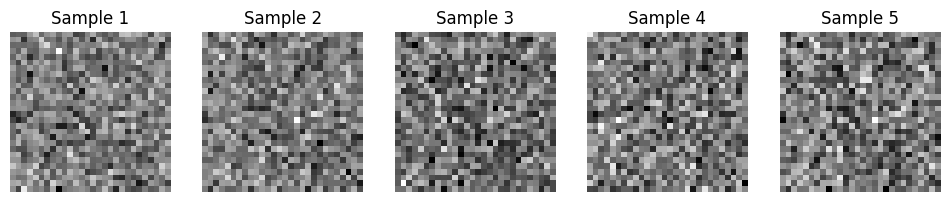

In [74]:
def sample_from_vae(num_samples=5):
    model =VAE()
    model.eval()  # Set the model to evaluation mode
    
    # Generate samples from the latent space
    samples = model.sample(num_samples)
    
    # Plot the generated samples
    import matplotlib.pyplot as plt
    
    fig, axes = plt.subplots(1, num_samples, figsize=(12, 5))
    for i in range(num_samples):
        axes[i].imshow(samples[i].cpu().numpy().reshape(28, 28), cmap="gray")
        axes[i].set_title(f"Sample {i + 1}")
        axes[i].axis("off")
    
    plt.show()

# After training:
#vae = train_vae(X_train)  # Train the model
sample_from_vae(num_samples=5)  # ✅ Generate 5 new samples


In [77]:
def sample_from_vae( model,num_samples=5):
    #model =VAE()
    model.eval()  # Set the model to evaluation mode
    
    with torch.no_grad():
        # Sample from a standard normal distribution in the latent space
        z = torch.randn(num_samples, model.num_hidden)  # Shape: (num_samples, latent_dim)
        samples = model.decoder(z)  # Decode the latent vector to generate new images
    
    # Plot the generated samples
    import matplotlib.pyplot as plt
    
    fig, axes = plt.subplots(1, num_samples, figsize=(12, 5))
    for i in range(num_samples):
        axes[i].imshow(samples[i].cpu().numpy().reshape(28, 28), cmap="gray")
        axes[i].set_title(f"Sample {i + 1}")
        axes[i].axis("off")
    
    plt.show()

# After training:
vae = train_vae(X_train)



Epoch 1/100: loss=5283.1414
Epoch 2/100: loss=4515.0801
Epoch 3/100: loss=4379.2995
Epoch 4/100: loss=4303.1145
Epoch 5/100: loss=4248.0333
Epoch 6/100: loss=4199.6376
Epoch 7/100: loss=4156.1289
Epoch 8/100: loss=4115.8028
Epoch 9/100: loss=4087.7835
Epoch 10/100: loss=4069.2488
Epoch 11/100: loss=4051.7752
Epoch 12/100: loss=4036.7151
Epoch 13/100: loss=4024.5359
Epoch 14/100: loss=4013.8398
Epoch 15/100: loss=4003.5718
Epoch 16/100: loss=3994.2215
Epoch 17/100: loss=3985.7323
Epoch 18/100: loss=3978.4610
Epoch 19/100: loss=3971.7941
Epoch 20/100: loss=3965.0473
Epoch 21/100: loss=3959.7232
Epoch 22/100: loss=3953.6967
Epoch 23/100: loss=3949.6666
Epoch 24/100: loss=3943.3140
Epoch 25/100: loss=3939.1638
Epoch 26/100: loss=3934.3830
Epoch 27/100: loss=3930.6684
Epoch 28/100: loss=3927.1674
Epoch 29/100: loss=3924.0413
Epoch 30/100: loss=3920.7801
Epoch 31/100: loss=3916.3182
Epoch 32/100: loss=3913.9682
Epoch 33/100: loss=3909.3916
Epoch 34/100: loss=3905.8526
Epoch 35/100: loss=3904

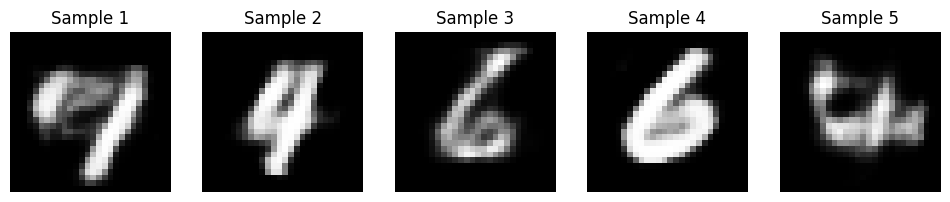

In [78]:
sample_from_vae(vae, num_samples=5)  # ✅ Generate 5 new samples